In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'Result.csv')
df.replace(np.nan,0,inplace=True)
col=[
    #'K-means','GMM','PCA_K-means','UMAP_HDBSCAN','T-SNE_HDBSCAN'
    'PCA_K-means','T-SNE_HDBSCAN','UMAP_HDBSCAN'
    ]
df=df[['tns_name','repeater']+col]
df.head()

,tns_name,repeater,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN
0,FRB20180725A,non-repeater,-1,0.0,0.0
1,FRB20180727A,non-repeater,-1,-1.0,-1.0
2,FRB20180729A,non-repeater,1,0.0,0.0
3,FRB20180729B,non-repeater,-1,0.0,0.0
4,FRB20180730A,non-repeater,-1,-1.0,-1.0


In [3]:
cm=pd.DataFrame(columns=['TP','FN','FP','TN','Recall','Precision','F2'],index=col)
beta=2
for i in col:
    cm.loc[i,'TP']=np.sum((df['repeater']=='repeater')&(df[i]==1))
    cm.loc[i,'FN']=np.sum((df['repeater']=='repeater')&(df[i]!=1))
    cm.loc[i,'FP']=np.sum((df['repeater']=='non-repeater')&(df[i]==1))
    cm.loc[i,'TN']=np.sum((df['repeater']=='non-repeater')&(df[i]!=1))
    cm['Recall']=cm['TP']/(cm['TP']+cm['FN'])
    cm['Precision']=cm['TP']/(cm['TP']+cm['FP'])
    cm['F2']=((beta**2+1)*cm['Recall']*cm['Precision'])/(beta**2*cm['Precision']+cm['Recall'])
cm.to_excel(r'Result_evaluation.xlsx')
cm.head()

,TP,FN,FP,TN,Recall,Precision,F2
PCA_K-means,85,9,127,373,0.904255,0.400943,0.722789
T-SNE_HDBSCAN,81,13,117,383,0.861702,0.409091,0.705575
UMAP_HDBSCAN,81,13,117,383,0.861702,0.409091,0.705575


In [4]:
df['sum']=np.zeros(len(df['repeater']))
for i in range(len(col)):
    df['sum']=df['sum']+df[col[i]]
df.head()

,tns_name,repeater,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN,sum
0,FRB20180725A,non-repeater,-1,0.0,0.0,-1.0
1,FRB20180727A,non-repeater,-1,-1.0,-1.0,-3.0
2,FRB20180729A,non-repeater,1,0.0,0.0,1.0
3,FRB20180729B,non-repeater,-1,0.0,0.0,-1.0
4,FRB20180730A,non-repeater,-1,-1.0,-1.0,-3.0


In [5]:
print(df.loc[(df.loc[:,'repeater']=='repeater')&(df.loc[:,'sum']<0),:])

         tns_name  repeater  PCA_K-means  T-SNE_HDBSCAN  UMAP_HDBSCAN  sum
61   FRB20181017A  repeater           -1            0.0           0.0 -1.0
415  FRB20190406A  repeater           -1            0.0           0.0 -1.0


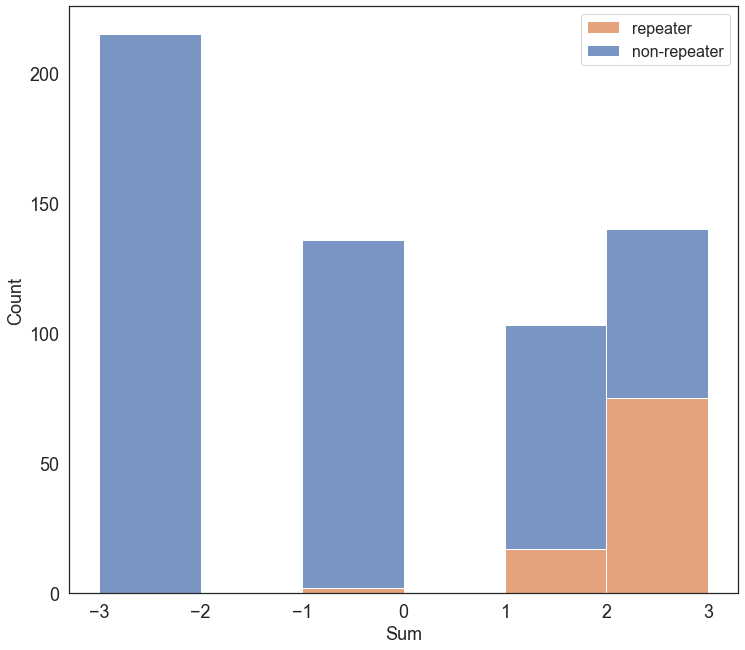

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')
p=12
fs=18
#figure = plt.figure(figsize=(1.5*p, p))
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
sns.histplot(data=df,x='sum',hue='repeater',multiple="stack",binwidth=1)
plt.tick_params(labelsize=fs)
plt.xlabel('Sum',fontsize=fs)
plt.ylabel('Count',fontsize=fs)
plt.legend(['repeater','non-repeater'],fontsize=fs-2)
plt.savefig('./fig/all.png',bbox_inches='tight',dpi=100,pad_inches=0.1)

In [7]:
#Result_rep=df.loc[df[df.repeater=='repeater'].index,col]
msum=np.max(df['sum'])
df_sum_max=df.loc[df[(df['sum']==msum)&(df.repeater=='non-repeater')].index,:]
print(df_sum_max.shape[0])
df_sum_max.head()

65


,tns_name,repeater,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN,sum
21,FRB20180907E,non-repeater,1,1.0,1.0,3.0
26,FRB20180911A,non-repeater,1,1.0,1.0,3.0
28,FRB20180915B,non-repeater,1,1.0,1.0,3.0
40,FRB20180920B,non-repeater,1,1.0,1.0,3.0
43,FRB20180923A,non-repeater,1,1.0,1.0,3.0


candidates

In [8]:
dataf=pd.read_csv(r'cul_cat1.csv')
canf=dataf.loc[df_sum_max.index,['tns_name','sub_num','ra','dec','peak_freq','log_bc_width','log_flux', 'log_fluence','redshift','fre_width', 'log_in_duration','log_energy','log_luminosity','log_T_B']]
canf.columns=['tns_name','sub','RA','Dec','\nu_{peak}','bcwidth','flux','fluence','z','\nu','\Delta_t','E','L','T_B']
canf.to_excel(r'candidate.xlsx',index=False)
canf

,tns_name,sub,RA,Dec,\nu_{peak},bcwidth,flux,fluence,z,\nu,\Delta_t,E,L,T_B
21,FRB20180907E,0,167.88,47.09,400.2,1.071882,-0.136677,0.838849,0.311849,178.542609,0.500164,39.852156,41.994513,27.888561
26,FRB20180911A,0,99.55,84.62,400.2,0.294466,0.204120,0.414973,0.084574,216.589472,-0.115658,38.263430,41.087836,28.619340
28,FRB20180915B,0,225.23,25.02,400.2,0.691965,-0.004365,0.579784,0.071801,136.333112,0.198799,38.283622,40.729588,27.471239
40,FRB20180920B,0,191.09,63.52,421.1,1.033826,-0.455932,0.230449,0.400657,116.534646,0.221024,39.491071,41.951022,27.826410
43,FRB20180923A,0,327.61,71.92,468.9,0.294466,-0.119186,0.079181,0.025874,177.168418,-0.835003,36.955959,39.768686,27.117945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,FRB20190609A,1,345.30,87.94,600.5,0.691965,0.556303,1.017033,0.200061,267.973717,0.247132,39.808022,42.426495,28.590349
552,FRB20190617A,0,178.60,83.87,409.9,0.691965,0.763428,1.322219,0.064605,290.637199,0.145706,38.943339,41.411736,28.125110
553,FRB20190617B,0,56.43,1.16,459.3,1.138618,-0.004365,0.963788,0.165517,217.368910,0.813151,39.468787,41.567153,27.199636
555,FRB20190618A,0,321.25,25.44,419.3,0.294466,0.380211,0.633468,0.067950,149.726605,-0.289770,38.308931,41.084224,28.561693


FAST candidates

In [9]:
fast=canf.loc[((canf.loc[:,'Dec']<=66)&(canf.loc[:,'Dec']>=-14)),:]
fast.to_excel(r'FAST_candidate.xlsx',index=False)
fast.shape

(51, 14)

### Proportion of repeater

In [10]:
pt=pd.DataFrame([np.zeros(len(col))],columns=col)
for i in col:
    pt.loc[0,i]=np.sum(df[i]==1)/len(df['tns_name'])*100
pt.head()

,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN
0,35.690236,33.333333,33.333333


# Gradient Descent

I W= O

In [11]:
''' col=[
    'K-means','GMM','PCA_K-means','PCA_GMM','UMAP_HDBSCAN',
    'HDBSCAN','T-SNE_HDBSCAN']
Result_rep=df.loc[df[df.repeater=='repeater'].index,col]
Result_rep.to_excel(r'Result_repeater.xlsx',index=False)
input=Result_rep.values
np.random.seed(42)
weight=np.random.rand(input.shape[1])
weight=1-weight#(0,1]
target=np.zeros(input.shape[0])+1 '''

" col=[\n    'K-means','GMM','PCA_K-means','PCA_GMM','UMAP_HDBSCAN',\n    'HDBSCAN','T-SNE_HDBSCAN']\nResult_rep=df.loc[df[df.repeater=='repeater'].index,col]\nResult_rep.to_excel(r'Result_repeater.xlsx',index=False)\ninput=Result_rep.values\nnp.random.seed(42)\nweight=np.random.rand(input.shape[1])\nweight=1-weight#(0,1]\ntarget=np.zeros(input.shape[0])+1 "

### Sigmoid
$ S(x)=\frac{1-e^{-x}}{1+e^{-x}}$

In [12]:
def sigmoid(x):
    return 2/(1+np.exp(-x))-1

Text(0, 0.5, 'y')

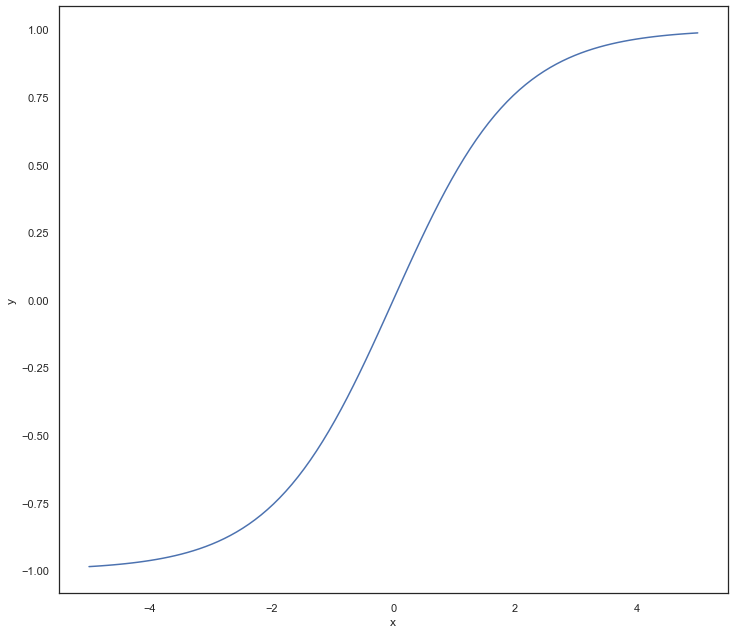

In [13]:
x=np.linspace(-5,5,100)
y=sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

### $W_j'=W_j+\alpha \sum_i (target_i-Sigmoid(output_i))\cdot [1-Sigmoid(output_i)^2]I_{ij}$

In [14]:
""" def weight_cul(input,labels,nr_con,Learning_rate=0.01):
    np.random.seed(42)
    weight=np.random.rand(input.shape[1])
    weight=1-weight#(0,1]
    target=labels
    output=np.dot(input,weight)
    S=sigmoid(output)
    error1=target-S
    error=np.zeros(input.shape[0])+input.shape[1]
    weight1=weight
    while(np.abs(np.sum(error1)-np.sum(error))>0.00001):
        #i=i+1
        error=error1
        weight=weight1
        t=error*(1-S*S)
        weight1=weight+2*Learning_rate*np.dot(t,input)
        weight1[np.where(weight1<=0)]=0.01
        #weight[np.where(weight<=-1)]=-1
        #weight[np.where(weight>=1)]=1
        output=np.dot(input,weight1)
        S=sigmoid(output)
        error1=target-S
        #print(np.sum(error1))
        #break
        #if(i>50):
        #    break
    return weight """

' def weight_cul(input,labels,nr_con,Learning_rate=0.01):\n    np.random.seed(42)\n    weight=np.random.rand(input.shape[1])\n    weight=1-weight#(0,1]\n    target=labels\n    output=np.dot(input,weight)\n    S=sigmoid(output)\n    error1=target-S\n    error=np.zeros(input.shape[0])+input.shape[1]\n    weight1=weight\n    while(np.abs(np.sum(error1)-np.sum(error))>0.00001):\n        #i=i+1\n        error=error1\n        weight=weight1\n        t=error*(1-S*S)\n        weight1=weight+2*Learning_rate*np.dot(t,input)\n        weight1[np.where(weight1<=0)]=0.01\n        #weight[np.where(weight<=-1)]=-1\n        #weight[np.where(weight>=1)]=1\n        output=np.dot(input,weight1)\n        S=sigmoid(output)\n        error1=target-S\n        #print(np.sum(error1))\n        #break\n        #if(i>50):\n        #    break\n    return weight '

In [15]:
''' Learning_rate=0.01
output=np.dot(input,weight)
S=sigmoid(output)
error1=target-S
error=np.zeros(input.shape[0])+input.shape[1]
weight1=weight '''

' Learning_rate=0.01\noutput=np.dot(input,weight)\nS=sigmoid(output)\nerror1=target-S\nerror=np.zeros(input.shape[0])+input.shape[1]\nweight1=weight '

In [16]:
''' while(np.abs(np.sum(error1)-np.sum(error))>0.00001):
    #i=i+1
    error=error1
    weight=weight1
    t=error*(1-S*S)
    weight1=weight+2*Learning_rate*np.dot(t,input)
    weight1[np.where(weight1<=0)]=0.01
    #weight[np.where(weight<=-1)]=-1
    #weight[np.where(weight>=1)]=1
    output=np.dot(input,weight1)
    S=sigmoid(output)
    error1=target-S
    print(np.sum(error1))
    #break
    #if(i>50):
    #    break '''

' while(np.abs(np.sum(error1)-np.sum(error))>0.00001):\n    #i=i+1\n    error=error1\n    weight=weight1\n    t=error*(1-S*S)\n    weight1=weight+2*Learning_rate*np.dot(t,input)\n    weight1[np.where(weight1<=0)]=0.01\n    #weight[np.where(weight<=-1)]=-1\n    #weight[np.where(weight>=1)]=1\n    output=np.dot(input,weight1)\n    S=sigmoid(output)\n    error1=target-S\n    print(np.sum(error1))\n    #break\n    #if(i>50):\n    #    break '

In [17]:
""" def random_weight(inputs,labels,nr_con,Learning_rate=0.001,n=1000):
    weight=np.zeros(inputs.shape[1])
    for i in range(n):
        input=inputs.sample(frac=0.2)
        weight=weight+weight_cul(input=input.values,labels=labels,nr_con=nr_con,Learning_rate=Learning_rate)
    return weight/n """

' def random_weight(inputs,labels,nr_con,Learning_rate=0.001,n=1000):\n    weight=np.zeros(inputs.shape[1])\n    for i in range(n):\n        input=inputs.sample(frac=0.2)\n        weight=weight+weight_cul(input=input.values,labels=labels,nr_con=nr_con,Learning_rate=Learning_rate)\n    return weight/n '

### input

In [18]:
cm['TNR']=cm['TN']/(cm['TN']+cm['FP'])
cm

,TP,FN,FP,TN,Recall,Precision,F2,TNR
PCA_K-means,85,9,127,373,0.904255,0.400943,0.722789,0.746
T-SNE_HDBSCAN,81,13,117,383,0.861702,0.409091,0.705575,0.766
UMAP_HDBSCAN,81,13,117,383,0.861702,0.409091,0.705575,0.766


In [19]:
pos=np.average(cm['TNR'])
print(pos)

0.7593333333333333


only repeater

In [20]:
''' label=df[df.repeater=='repeater'].index
Result_rep=df.loc[label,col]
label=(df.loc[label,'repeater']=='repeater')*2-1
Result_rep.to_excel(r'Result_repeater.xlsx',index=False)
print(label) '''

" label=df[df.repeater=='repeater'].index\nResult_rep=df.loc[label,col]\nlabel=(df.loc[label,'repeater']=='repeater')*2-1\nResult_rep.to_excel(r'Result_repeater.xlsx',index=False)\nprint(label) "

all

In [21]:
''' input=df.loc[:,col]
label=(df.loc[:,'repeater']=='repeater')*2-1
print(input)
print(label) '''

" input=df.loc[:,col]\nlabel=(df.loc[:,'repeater']=='repeater')*2-1\nprint(input)\nprint(label) "

In [22]:
#weight=random_weight(inputs=input,labels=label,nr_con=pos,Learning_rate=0.01,n=500)
#print(weight)

[1.89354672e-04 1.00000000e-02 2.04739474e-03 8.33655163e-03
 4.87835606e+00 1.05634339e+00 1.40744958e+00]

# weight from $F_\beta$

In [23]:
beta=2
F_B=((beta**2+1)*cm['Recall']*cm['Precision'])/(beta**2*cm['Precision']+cm['Recall'])
print(F_B)
weight=F_B#weight from F2
da=df.loc[:,col].values
dot_weight=np.dot(da,weight)
df['dot_weight']=dot_weight#sigmoid(dot_weight)
#df['dot_weight']=dot_weight
df#.head()

PCA_K-means      0.722789
T-SNE_HDBSCAN    0.705575
UMAP_HDBSCAN     0.705575
dtype: object


,tns_name,repeater,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN,sum,dot_weight
0,FRB20180725A,non-repeater,-1,0.0,0.0,-1.0,-0.722789
1,FRB20180727A,non-repeater,-1,-1.0,-1.0,-3.0,-2.133939
2,FRB20180729A,non-repeater,1,0.0,0.0,1.0,0.722789
3,FRB20180729B,non-repeater,-1,0.0,0.0,-1.0,-0.722789
4,FRB20180730A,non-repeater,-1,-1.0,-1.0,-3.0,-2.133939
...,...,...,...,...,...,...,...
589,FRB20190701A,non-repeater,-1,0.0,0.0,-1.0,-0.722789
590,FRB20190701B,non-repeater,-1,0.0,0.0,-1.0,-0.722789
591,FRB20190701C,non-repeater,-1,1.0,1.0,1.0,0.688361
592,FRB20190701D,non-repeater,-1,0.0,0.0,-1.0,-0.722789


Text(0, 0.5, 'Count')

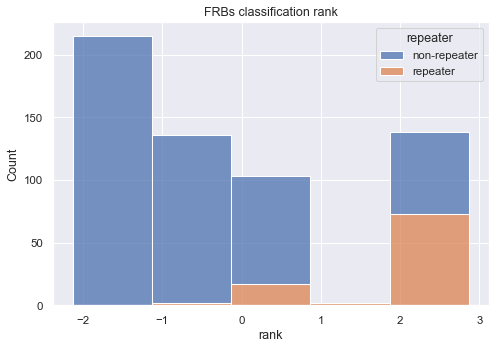

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')
p=5
figure = plt.figure(figsize=(1.5*p, p))
sns.histplot(
    data=df,
    x='dot_weight',
    hue='repeater',
    multiple="stack",
    binwidth=1
    )
plt.title('FRBs classification rank')
plt.xlabel('rank')
plt.ylabel('Count')
#plt.savefig(f'./fig/conclusion.png')

In [25]:
df.head()

,tns_name,repeater,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN,sum,dot_weight
0,FRB20180725A,non-repeater,-1,0.0,0.0,-1.0,-0.722789
1,FRB20180727A,non-repeater,-1,-1.0,-1.0,-3.0,-2.133939
2,FRB20180729A,non-repeater,1,0.0,0.0,1.0,0.722789
3,FRB20180729B,non-repeater,-1,0.0,0.0,-1.0,-0.722789
4,FRB20180730A,non-repeater,-1,-1.0,-1.0,-3.0,-2.133939


In [26]:
#Result_rep=df.loc[df[df.repeater=='repeater'].index,col]
m=np.max(df['dot_weight'])
df_max=df.loc[df[(df.dot_weight==m)&(df.repeater=='non-repeater')].index,:]
print(df_max.shape[0])
df_max

65


,tns_name,repeater,PCA_K-means,T-SNE_HDBSCAN,UMAP_HDBSCAN,sum,dot_weight
21,FRB20180907E,non-repeater,1,1.0,1.0,3.0,2.133939
26,FRB20180911A,non-repeater,1,1.0,1.0,3.0,2.133939
28,FRB20180915B,non-repeater,1,1.0,1.0,3.0,2.133939
40,FRB20180920B,non-repeater,1,1.0,1.0,3.0,2.133939
43,FRB20180923A,non-repeater,1,1.0,1.0,3.0,2.133939
...,...,...,...,...,...,...,...
537,FRB20190609A,non-repeater,1,1.0,1.0,3.0,2.133939
552,FRB20190617A,non-repeater,1,1.0,1.0,3.0,2.133939
553,FRB20190617B,non-repeater,1,1.0,1.0,3.0,2.133939
555,FRB20190618A,non-repeater,1,1.0,1.0,3.0,2.133939


In [27]:
rt=df.loc[:,['tns_name','repeater']]
b=(rt['repeater']=='repeater')
rt['rank']=df['dot_weight']
rt['classification']=b
for i in range(len(b)):
    if(df.loc[i,'dot_weight']>=0)&(rt.loc[i,'classification']==True):
        rt.loc[i,'classification']='repeater'
    elif(df.loc[i,'dot_weight']>=0)&(rt.loc[i,'classification']==False):
        rt.loc[i,'classification']='candidate'
    else:
        rt.loc[i,'classification']='non-repeater'
rt.head()

,tns_name,repeater,rank,classification
0,FRB20180725A,non-repeater,-0.722789,non-repeater
1,FRB20180727A,non-repeater,-2.133939,non-repeater
2,FRB20180729A,non-repeater,0.722789,candidate
3,FRB20180729B,non-repeater,-0.722789,non-repeater
4,FRB20180730A,non-repeater,-2.133939,non-repeater


In [28]:
#rt.to_csv('conclusion.csv',index=False)